In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier

In [2]:
brazil = pd.read_excel('brazil covid.xlsx')

In [3]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 107 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(66), int64(4), object(37)
memory usage: 4.6+ MB


In [4]:
brazil.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 107, dtype: int64

In [5]:
brazil["SARS-Cov-2 exam result"].replace(['negative','positive'],[0,1],inplace = True)

In [6]:
brazil

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
brazil.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=107)

In [8]:
brazil.drop(['Patient ID'],axis=1,inplace=True)

In [9]:
brazil['Hemoglobin'].unique()

array([        nan, -0.02234027, -0.774212  , -0.58624387,  0.79218763,
       -0.14765212,  0.85484385, -0.71155578,  0.04031596,  1.04281187,
       -0.33562019,  1.23077941,  0.60421956,  0.66687578,  1.16812372,
        0.35359588, -0.46093205,  0.54156393,  0.29093966, -0.0849959 ,
       -0.83686763, -0.89952385,  0.22828403, -0.39827582,  1.35609186,
        0.729532  , -0.64890015, -1.21280372, -1.96467543,  2.04530787,
       -0.52358764,  1.48140311,  0.10297218, -1.33811557,  0.41625211,
        1.60671556,  1.10546756, -1.90201986,  0.98015571, -0.21030775,
       -1.27546   , -0.27296397,  0.16562781, -1.02483571, -1.40077186,
       -1.52608371,  1.41874802,  1.54405928,  2.48389912, -1.71405172,
        1.29343557, -2.08998728, -1.08749187, -1.15014756,  1.73202801,
       -0.96218008,  0.47890773,  2.23327541,  1.66937172,  0.91749948,
       -2.21529984, -1.65139556, -1.46342742,  1.79468298,  2.10796285,
        2.29593158, -3.02982712, -3.84435511,  2.17061925, -2.02

In [11]:
brazil['Hb saturation (arterial blood gases)'].unique()

array([        nan,  0.73834962,  0.26776886,  1.16614795, -1.35786271,
        0.48166803, -0.37392861,  0.99502796, -1.40064192, -1.44342434,
       -1.18674278, -1.05840528,  0.09665216, -1.99956024,  0.86668712,
        0.69556719,  0.61000884,  1.29448545, -1.27230442, -0.20280862,
        0.39610967, -0.03168864,  1.33726466,  0.22498968])

In [12]:
brazil['pCO2 (arterial blood gas analysis)'].unique()

array([        nan, -0.04610435, -0.48870584, -0.37805539, -0.67312318,
       -0.14753374, -0.34117216,  0.30428851,  0.93130738, -0.35961396,
       -0.07376688,  0.29506776, -0.5901354 ,  3.1258738 , -0.5809145 ,
        0.52558947, -1.2448169 , -0.23052168, -0.21207988, -0.13831301,
       -0.72844839,  0.09220864, -0.74689019,  3.23652387, -0.76533186,
       -0.20285915])

In [13]:
brazil.dtypes

Patient age quantile                                       int64
SARS-Cov-2 exam result                                     int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 106, dtype: object

In [14]:
brazil.select_dtypes(include=['object']).columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test',
       'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

In [15]:
cat = ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test',
       'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']
for i in cat:
    brazil[i]=brazil[i].fillna(brazil[i].mode())


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    brazil[i] = le.fit_transform(brazil[i].astype(str))

In [17]:
brazil.select_dtypes(include=['int64']).columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

In [18]:
col1= ['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)']
for i in col1:
    brazil[i]=brazil[i].fillna(brazil[i].mean())

In [19]:
col2=['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
        'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine transaminase', 'Aspartate transaminase',
        'Total Bilirubin', 'Direct Bilirubin',
       'Indirect Bilirubin', 'Alkaline phosphatase',
       'Magnesium', 'pCO2 (venous blood gas analysis)',
       'Hb saturation (venous blood gas analysis)',
       'Base excess (venous blood gas analysis)',
       'pO2 (venous blood gas analysis)', 'Fio2 (venous blood gas analysis)',
       'Total CO2 (venous blood gas analysis)',
       'pH (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)',
       'Rods #', 'Segmented', 'Promyelocytes', 'Metamyelocytes', 'Myelocytes',
       'Myeloblasts', 'Urine - Density', 'Urine - Sugar',
       'Urine - Red blood cells',
       'Relationship (Patient/Normal)', 'International normalized ratio (INR)',
       'Lactic Dehydrogenase', 'Prothrombin time (PT), Activity',
       'Vitamin B12', 'Ferritin',
       'Arterial Lactic Acid', 'Lipase dosage', 'D-Dimer', 'Albumin',
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)']
for i in col2:
    brazil[i]=brazil[i].fillna(brazil[i].mean())

In [20]:
brazil.select_dtypes(include=['float64']).columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine transaminase', 'Aspartate transaminase', 'Total Bilirubin',
       'Direct Bilirubin', 'Indirect Bilirubin', 'Alkaline phosphatase',
       'Magnesium', 'pCO2 (venous blood gas analysis)',
       'Hb saturation (venous blood gas analysis)',
       'Base excess (venous blood gas analysis)',
       'pO2 (venous blood gas analysis)', 'Fio2 (venous blood gas analysis)',
       'Total CO2 (venous blood gas analysis)',
       'pH (venous blood gas analysis)', 'HCO3 (venous blood 

In [21]:
brazil1 = brazil.fillna(0)

In [22]:
brazil1.fillna(brazil1.mean(),inplace=True)

In [24]:
pca = PCA(n_components=16)

In [69]:
x = brazil1.drop(['SARS-Cov-2 exam result'],axis=1)

In [70]:
xpca = pca.fit_transform(x)
x =xpca


In [71]:
x.shape

(5644, 16)

In [72]:
y= brazil['SARS-Cov-2 exam result']

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [74]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [75]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 6}

In [76]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 13}

In [77]:
knn =KNeighborsClassifier(n_neighbors=6)
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 13)
gb =GaussianNB()
lg = LogisticRegression()

In [78]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("KNeighborsClassifier",knn))
models.append(("LogisticRegression",lg))
models.append(("GaussianNB",gb))
models.append(("RandomForestClassifier",rfc))

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.8813741277509394


cross_val_score=  0.8988316701186216


roc_auc_score =  0.5073383789550896


Classification_Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1685
           1       0.14      0.04      0.07       178

    accuracy                           0.88      1863
   macro avg       0.52      0.51      0.50      1863
weighted avg       0.83      0.88      0.85      1863



[[1634   51]
 [ 170    8]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf'

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross_val_score=  0.8949362957384046


roc_auc_score =  0.5381188944086953


Classification_Report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1685
           1       0.41      0.09      0.15       178

    accuracy                           0.90      1863
   macro avg       0.66      0.54      0.55      1863
weighted avg       0.86      0.90      0.87      1863



[[1662   23]
 [ 162   16]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.8813741277509394


cross_val_score=  0.8988316701186216


roc_auc_score =  0.5073383789550896


Classification_Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94 

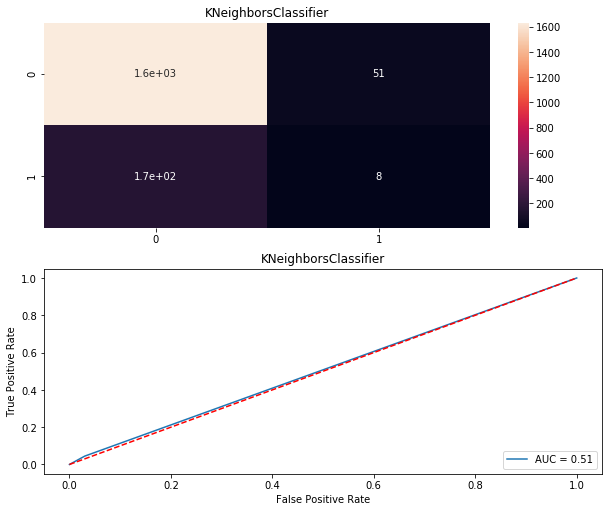

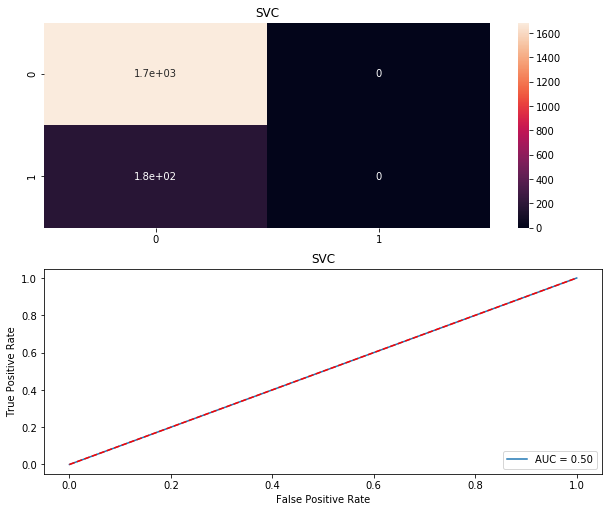

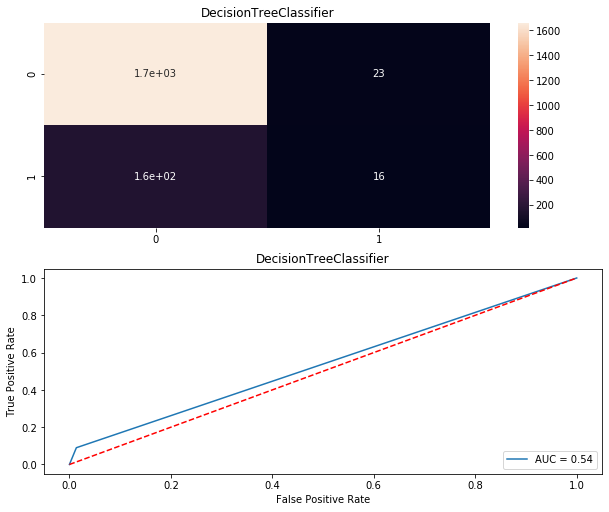

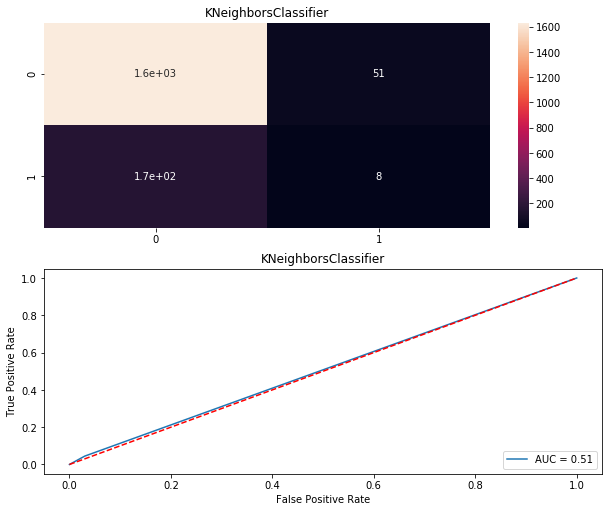

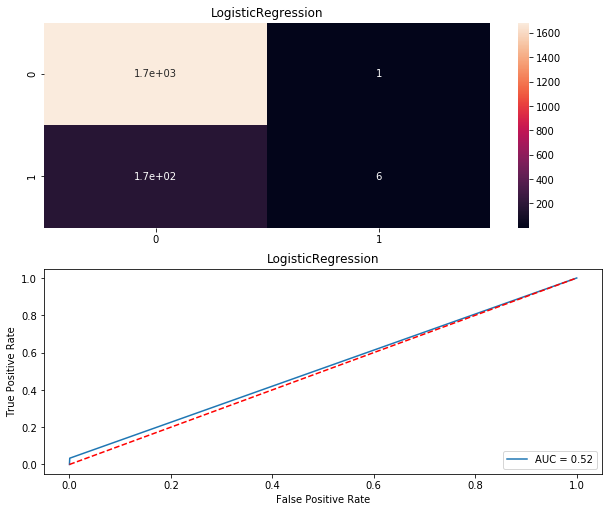

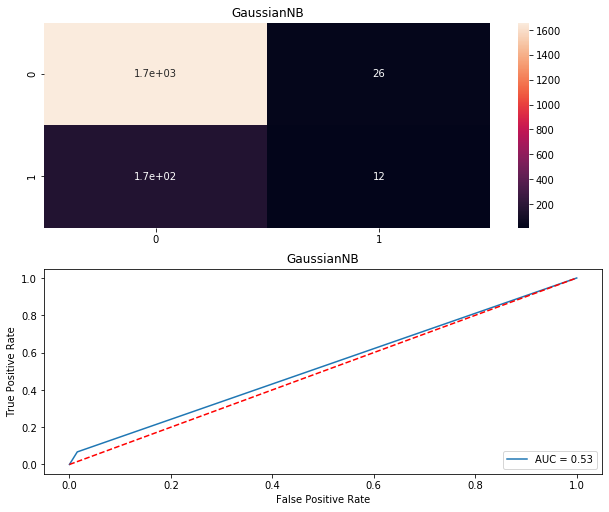

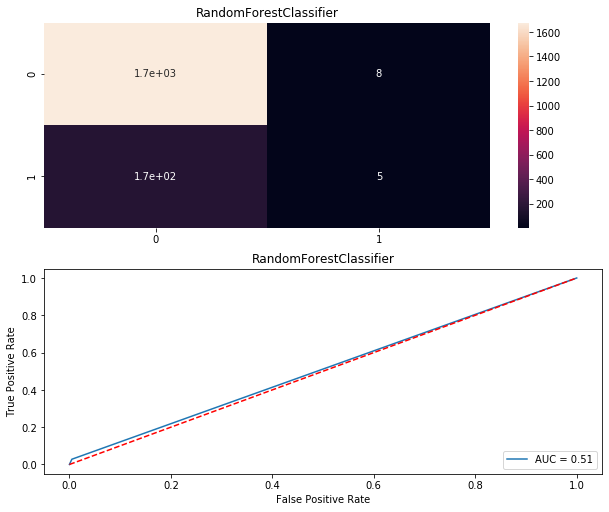

In [79]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [80]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,88.137413,89.883167,50.733838
1,SVC,90.445518,90.095713,50.000000
2,DecisionTreeClassifier,90.069780,89.493630,53.811889
3,KNeighborsClassifier,88.137413,89.883167,50.733838
4,LogisticRegression,90.713902,90.078202,51.655720
5,GaussianNB,89.694042,86.871242,52.599273
6,RandomForestClassifier,90.284487,90.219827,51.167106


In [81]:
from sklearn.externals import joblib  
joblib.dump(dt,'Covid result.obj')

['Covid result.obj']

In [82]:
model=joblib.load('Covid Result.obj')
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
brazil.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=106)

In [84]:
x = brazil1.drop('Patient addmited to regular ward (1=yes, 0=no)',axis=1)
y = brazil1['Patient addmited to regular ward (1=yes, 0=no)']

In [85]:
xpca = pca.fit_transform(x)
x =xpca

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [87]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 2}

In [88]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 6}

In [89]:
rfc = RandomForestClassifier(n_estimators= 6)
knn =KNeighborsClassifier(n_neighbors=2)

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.9860440150295223


cross_val_score=  0.9860029498525075


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1837
           1       0.00      0.00      0.00        26

    accuracy                           0.99      1863
   macro avg       0.49      0.50      0.50      1863
weighted avg       0.97      0.99      0.98      1863



[[1837    0]
 [  26    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score =  0.9860440150295223


cross_val_score=  0.9860029498525075


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1837
           1       0.00      0.00      0.00        26

    accuracy                           0.99      1863
   macro avg       0.49      0.50      0.50      1863
weighted avg       0.97      0.99      0.98      1863



[[1837    0]
 [  26    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_sta

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross_val_score=  0.9762583945270823


roc_auc_score =  0.5901658222017503


Classification_Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1837
           1       0.19      0.19      0.19        26

    accuracy                           0.98      1863
   macro avg       0.59      0.59      0.59      1863
weighted avg       0.98      0.98      0.98      1863



[[1815   22]
 [  21    5]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.9860440150295223


cross_val_score=  0.9860029498525075


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1837
     

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross_val_score=  0.9844081466139458


roc_auc_score =  0.538189355554625


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1837
           1       0.67      0.08      0.14        26

    accuracy                           0.99      1863
   macro avg       0.83      0.54      0.57      1863
weighted avg       0.98      0.99      0.98      1863



[[1836    1]
 [  24    2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy score =  0.9092860976918948


cross_val_score=  0.91177304964539


roc_auc_score =  0.7833738118169256


Classification_Report
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1837
           1       0.10      0.65      0.17        26

    accuracy                           0.91      1863
   macro avg       0.55      0.78   

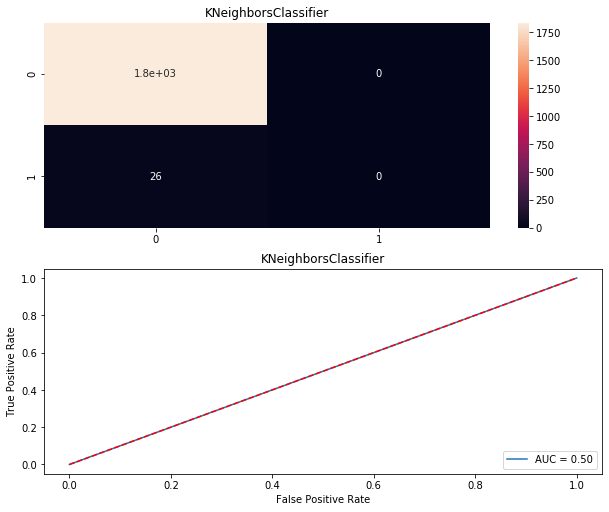

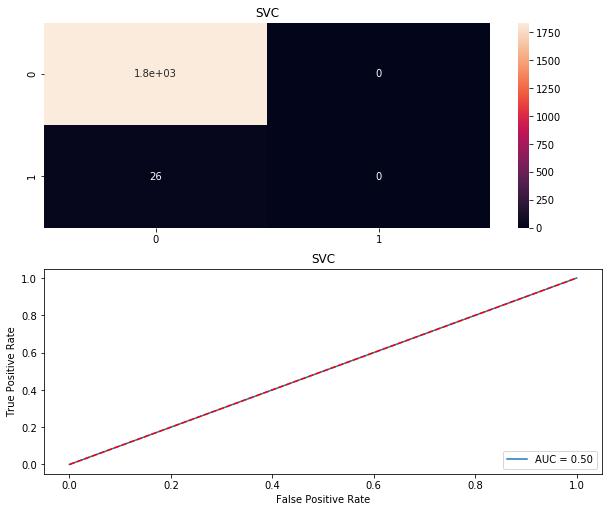

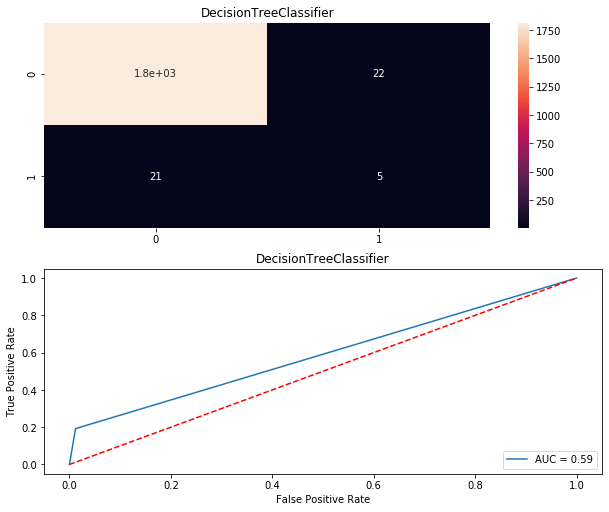

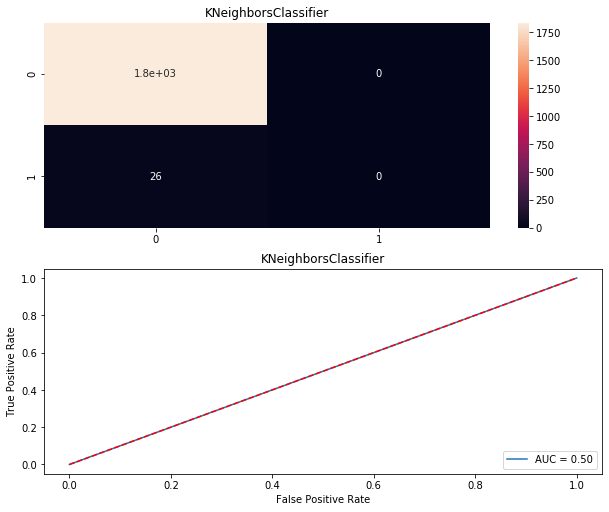

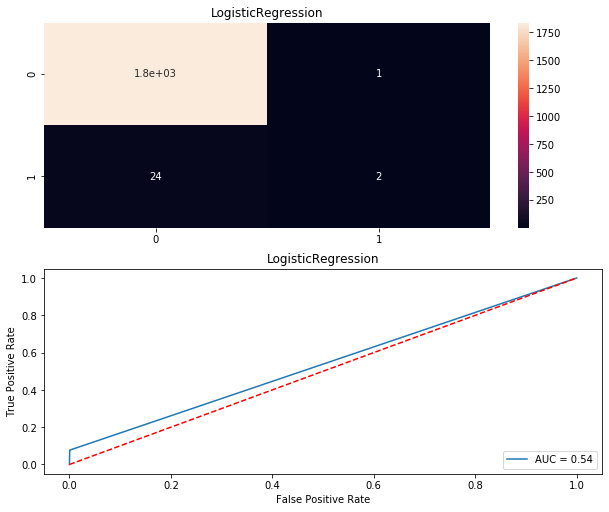

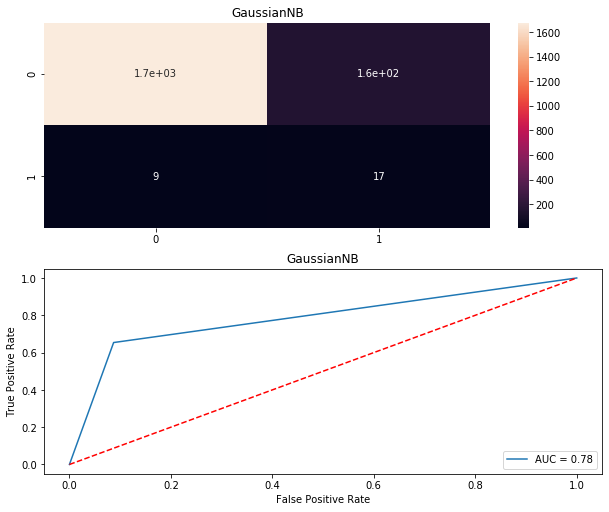

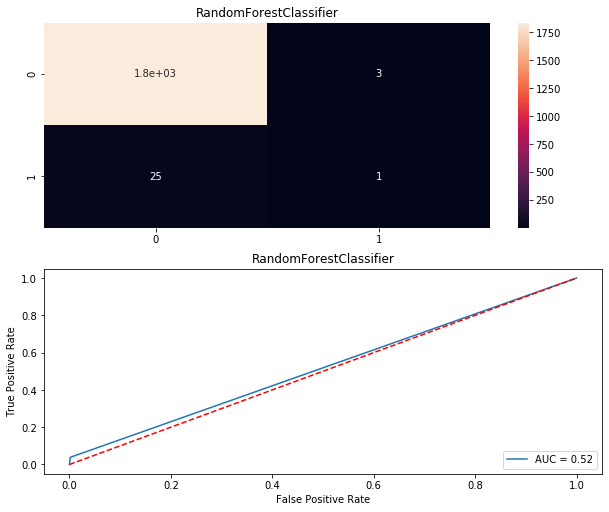

In [90]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [91]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,98.604402,98.600295,50.000000
1,SVC,98.604402,98.600295,50.000000
2,DecisionTreeClassifier,97.691895,97.625839,59.016582
3,KNeighborsClassifier,98.604402,98.600295,50.000000
4,LogisticRegression,98.658078,98.440815,53.818936
5,GaussianNB,90.928610,91.177305,78.337381
6,RandomForestClassifier,98.497048,98.387592,51.841422


In [92]:
from sklearn.externals import joblib  
joblib.dump(gb,'Regular Ward.obj')

['Regular Ward.obj']

In [93]:
model = joblib.load('Regular Ward.obj')
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
x = brazil1.drop('Patient addmited to semi-intensive unit (1=yes, 0=no)',axis=1)
y = brazil1['Patient addmited to semi-intensive unit (1=yes, 0=no)']

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [96]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 8}

In [97]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 6}

In [98]:
rfc = RandomForestClassifier(n_estimators=6)
knn =KNeighborsClassifier(n_neighbors=8)

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.9908749329039184


cross_val_score=  0.9909637230904412


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1846
           1       0.00      0.00      0.00        17

    accuracy                           0.99      1863
   macro avg       0.50      0.50      0.50      1863
weighted avg       0.98      0.99      0.99      1863



[[1846    0]
 [  17    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Accuracy score =  0.9908749329039184


cross_val_score=  0.9911410280549802


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1846
           1       0.00      0.00      0.00        17

    accuracy                           0.99      1863
   macro avg       0.50      0.50      0.50      1863
weighted avg       0.98      0.99      0.99      1863



[[1846    0]
 [  17    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_s

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Accuracy score =  0.986580783682233


cross_val_score=  0.9856470846670433


roc_auc_score =  0.6435376967688484


Classification_Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1846
           1       0.28      0.29      0.29        17

    accuracy                           0.99      1863
   macro avg       0.64      0.64      0.64      1863
weighted avg       0.99      0.99      0.99      1863



[[1833   13]
 [  12    5]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.9908749329039184


cross_val_score=  0.9909637230904412


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.989801395598497




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

cross_val_score=  0.9895455971882257


roc_auc_score =  0.5577401057931298


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1846
           1       0.33      0.12      0.17        17

    accuracy                           0.99      1863
   macro avg       0.66      0.56      0.58      1863
weighted avg       0.99      0.99      0.99      1863



[[1842    4]
 [  15    2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy score =  0.9586688137412775


cross_val_score=  0.9532329128224439


roc_auc_score =  0.8334395513351603


Classification_Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1846
           1       0.14      0.71      0.24        17

    accuracy                           0.96      1863
   macro avg       0.57      0.83

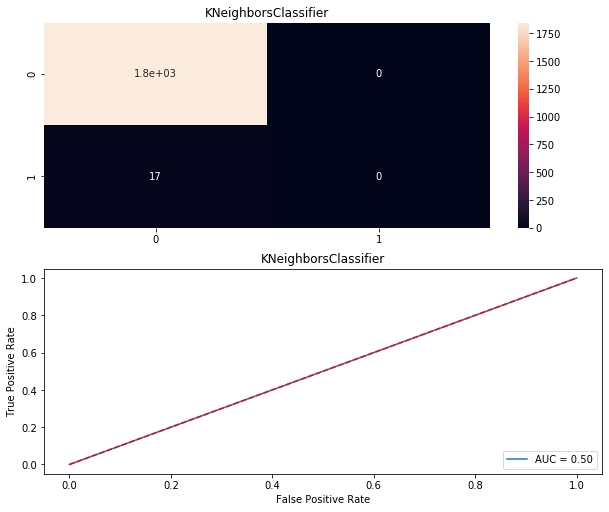

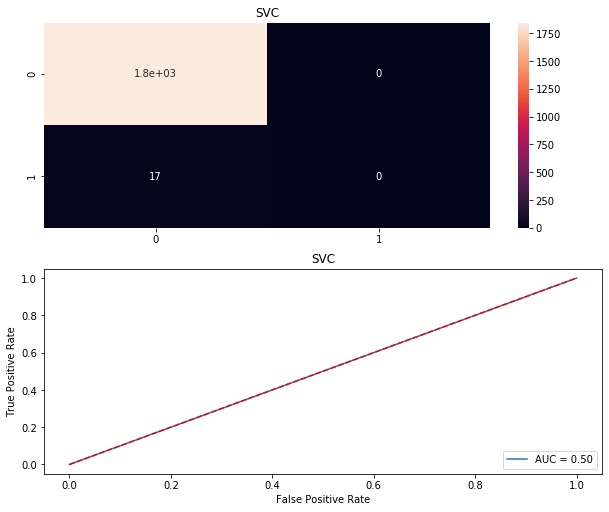

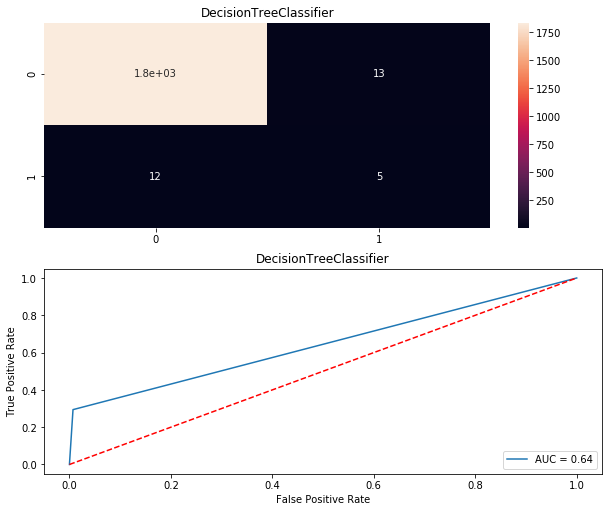

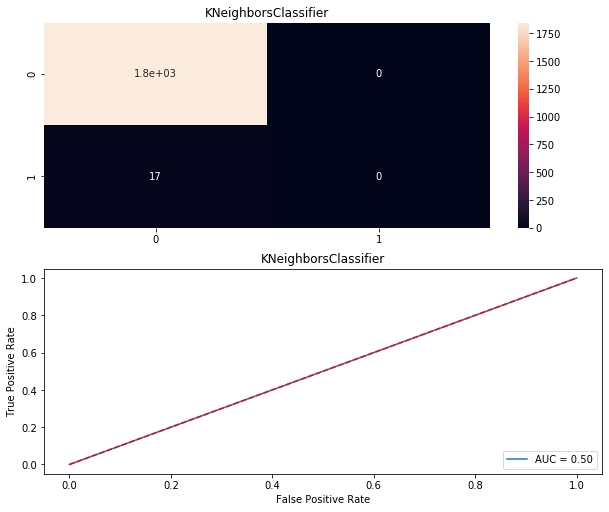

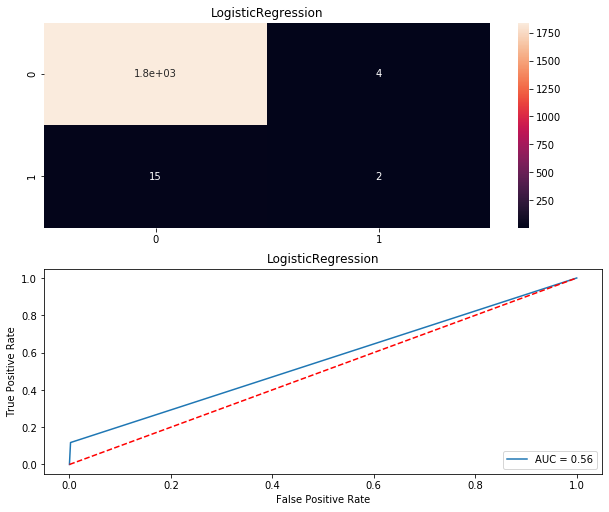

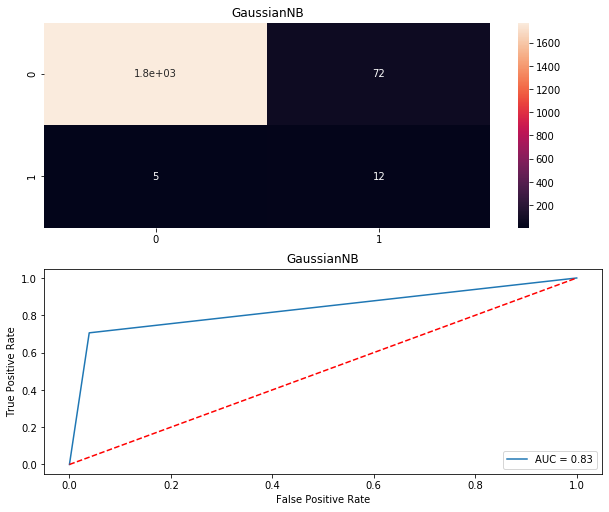

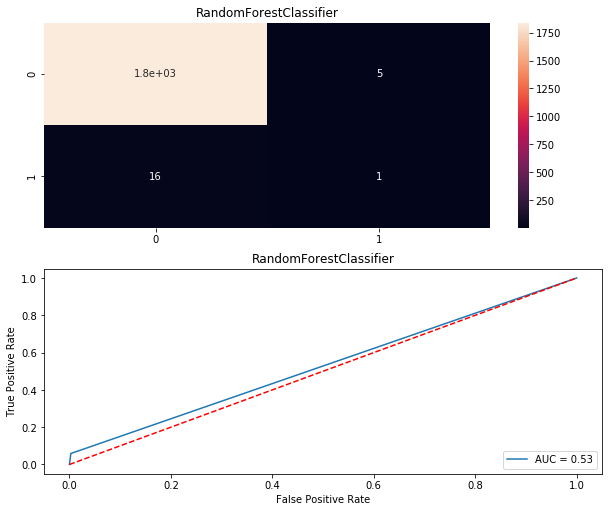

In [99]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [100]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,99.087493,99.096372,50.000000
1,SVC,99.087493,99.114103,50.000000
2,DecisionTreeClassifier,98.658078,98.564708,64.353770
3,KNeighborsClassifier,99.087493,99.096372,50.000000
4,LogisticRegression,98.980140,98.954560,55.774011
5,GaussianNB,95.866881,95.323291,83.343955
6,RandomForestClassifier,98.872786,98.795079,52.805749


In [101]:
from sklearn.externals import joblib  
joblib.dump(gb,'Semi intensive Ward.obj')

['Semi intensive Ward.obj']

In [102]:
model = joblib.load('Semi intensive Ward.obj')
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
x= brazil1.drop('Patient addmited to intensive care unit (1=yes, 0=no)',axis=1)
y = brazil1['Patient addmited to intensive care unit (1=yes, 0=no)']

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [105]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 6}

In [106]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 6}

In [107]:
rfc = RandomForestClassifier(n_estimators=6)
knn =KNeighborsClassifier(n_neighbors=6)

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.991411701556629


cross_val_score=  0.9927358312935416


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1847
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1863
   macro avg       0.50      0.50      0.50      1863
weighted avg       0.98      0.99      0.99      1863



[[1847    0]
 [  16    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross_val_score=  0.9927358312935416


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1847
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1863
   macro avg       0.50      0.50      0.50      1863
weighted avg       0.98      0.99      0.99      1863



[[1847    0]
 [  16    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy sc

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross_val_score=  0.9891919287014372


roc_auc_score =  0.5597929074174337


Classification_Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1847
           1       0.17      0.12      0.14        16

    accuracy                           0.99      1863
   macro avg       0.58      0.56      0.57      1863
weighted avg       0.99      0.99      0.99      1863



[[1837   10]
 [  14    2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score =  0.991411701556629


cross_val_score=  0.9927358312935416


roc_auc_score =  0.5


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1847
      

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



********************* LogisticRegression ***********************




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.989801395598497




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

cross_val_score=  0.9918502479131363


roc_auc_score =  0.5301671629669734


Classification_Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1847
           1       0.20      0.06      0.10        16

    accuracy                           0.99      1863
   macro avg       0.60      0.53      0.55      1863
weighted avg       0.99      0.99      0.99      1863



[[1843    4]
 [  15    1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy score =  0.942565754159957


cross_val_score=  0.9466782777882383


roc_auc_score =  0.7541790741743367


Classification_Report
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1847
           1       0.08      0.56      0.14        16

    accuracy                           0.94      1863
   macro avg       0.54      0.75 

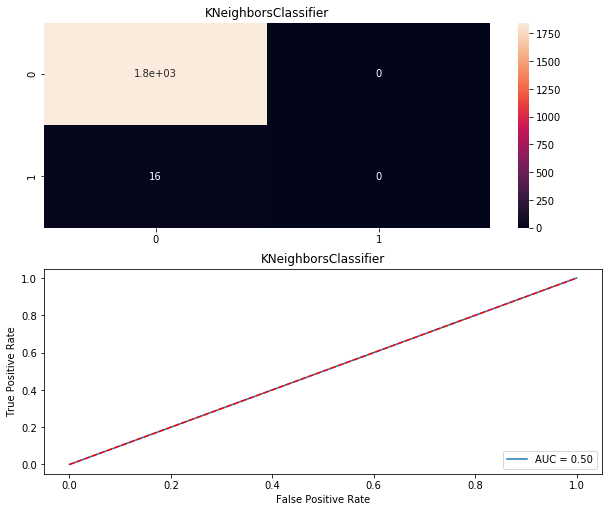

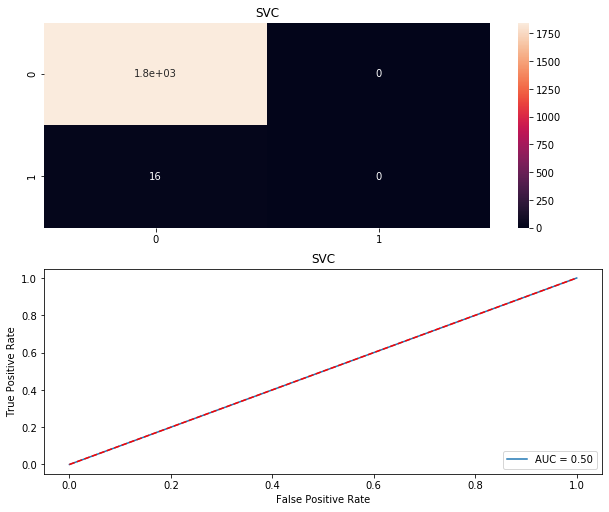

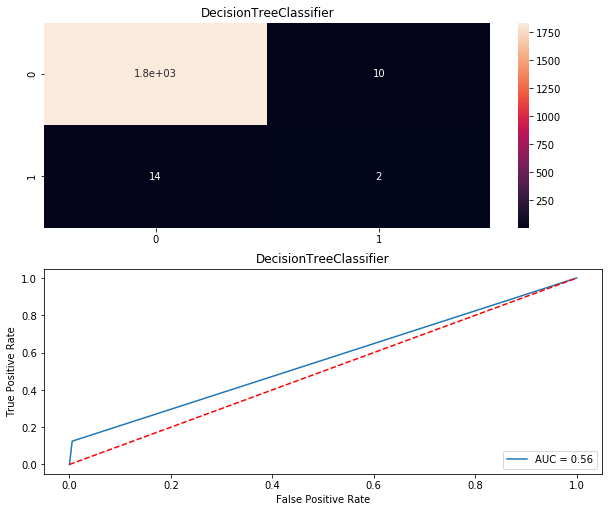

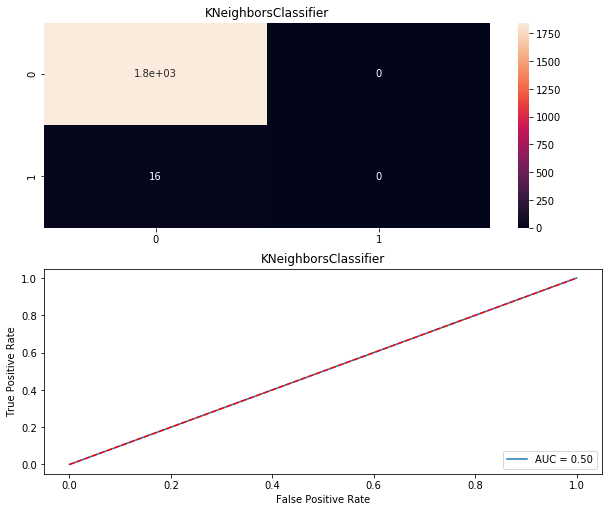

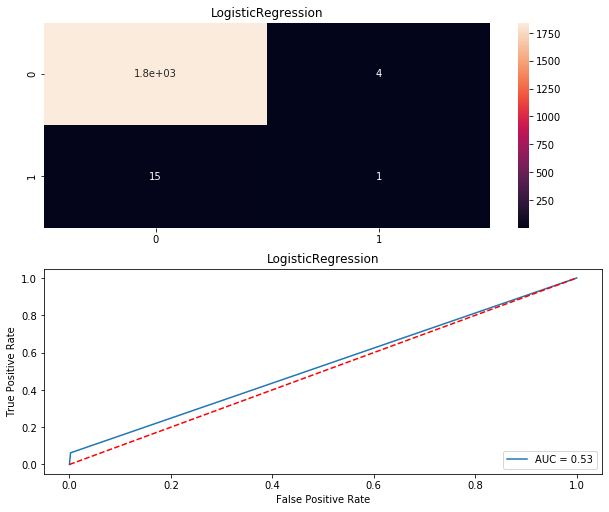

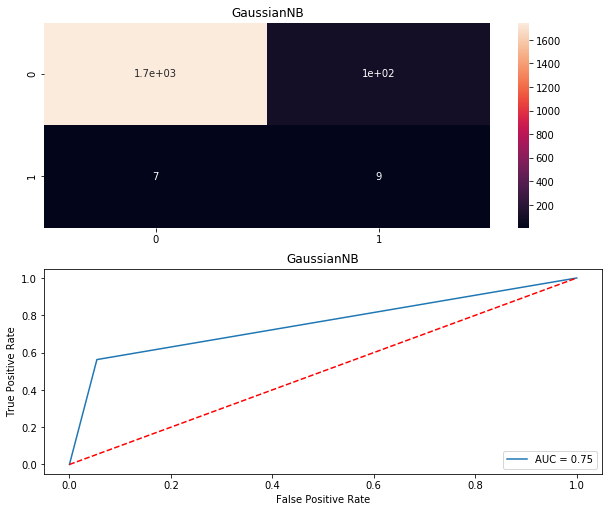

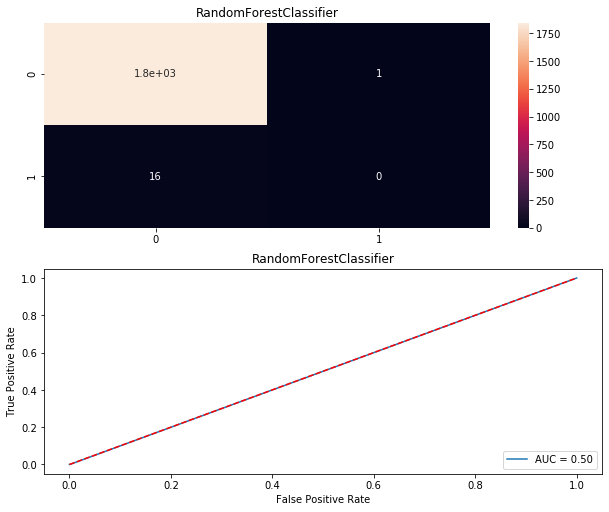

In [108]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [109]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,99.141170,99.273583,50.000000
1,SVC,99.141170,99.273583,50.000000
2,DecisionTreeClassifier,98.711755,98.919193,55.979291
3,KNeighborsClassifier,99.141170,99.273583,50.000000
4,LogisticRegression,98.980140,99.185025,53.016716
5,GaussianNB,94.256575,94.667828,75.417907
6,RandomForestClassifier,99.087493,99.149595,49.972929


In [110]:
from sklearn.externals import joblib  
joblib.dump(gb,'Intensive Care Ward.obj')

['Intensive Care Ward.obj']

In [111]:
model = joblib.load('Intensive Care Ward.obj')
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)